## Dataset Loading

In [82]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

import graphviz 

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [83]:
heart = pd.read_csv('heart.csv')
star = pd.read_csv('Stars.csv')

In [84]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [87]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Backgroud Setting

자주 사용될 함수나 변수등을 미리 설정합니다.

In [88]:
SEED = 42

In [89]:
def data_explanation(data, name):
    """
    This function is for data explanation.
    """
    
    with open(f'./data_description_{name}.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
data_explanation(heart, 'heart')
data_explanation(star, 'star')

features_heart = heart.drop('target', axis=1)
target_heart = heart['target']
features_star = star.drop('Type', axis=1)
target_star = star['Type']

In [90]:
# Performance Evaluation Function ------------------------------------------------
def perf_eval(y_test, y_pred):
    
    '''
    confusion matrix to TPR, PRE, TNR, ACC, BCR, F1
    
    '''
    cm = confusion_matrix(y_test, y_pred)
    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)
    # AUROC
    AUROC = roc_auc_score(y_test, y_pred)
    
    return TPR, PRE, TNR, ACC, BCR, F1, AUROC

In [91]:
# Performance table
Perf_Table = pd.DataFrame(columns = ["TPR", "Precision", "TNR",  
                                     "Accuracy", "BCR", "F1-Measure", "AUROC"])

In [92]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure,AUROC


## Decision Tree

### FULL Tree

In [93]:
# Decision Tree -----------------------------------------------------------------
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(features_heart, target_heart,
                                                    test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=61, random_state=SEED)
print(len(X_train), len(X_val), len(X_test))
# 2. Decision Tree
full_tree = DecisionTreeClassifier(random_state=SEED)
full_tree.fit(X_train, y_train)

181 61 61


DecisionTreeClassifier(random_state=42)

In [94]:
full_tree.score(X_train, y_train)

1.0

In [95]:
full_tree.score(X_val, y_val)

0.7704918032786885

In [96]:
full_tree.score(X_test, y_test)

0.8360655737704918

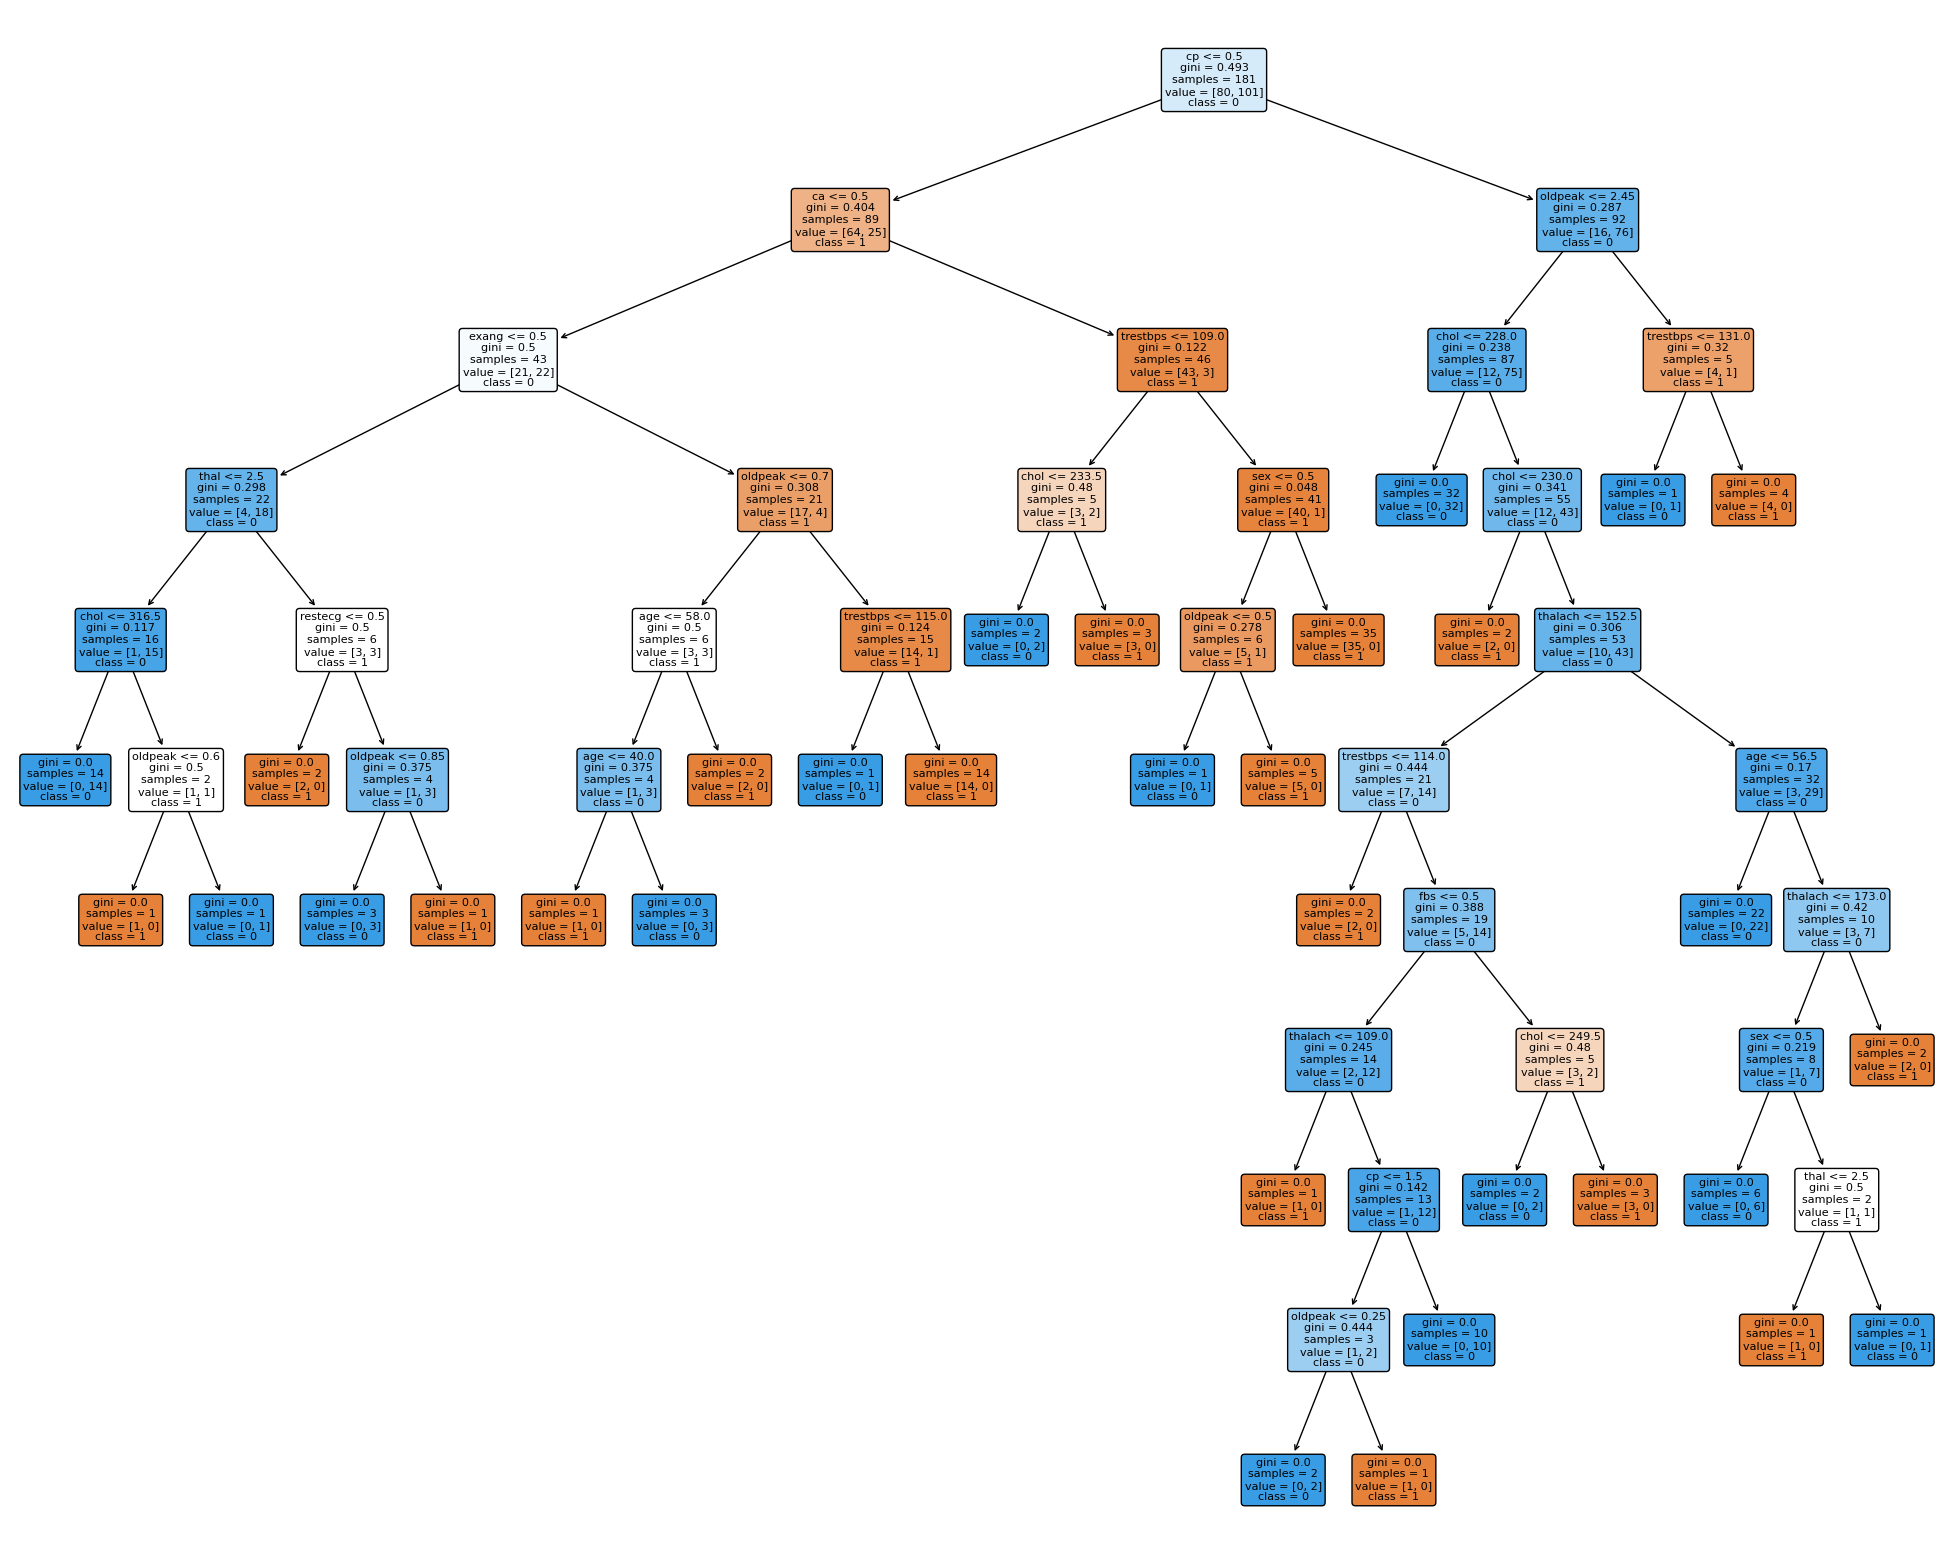

In [97]:
#Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(full_tree,
              feature_names=features_heart.columns.values,
              class_names=list(map(str, target_heart.unique())),
              rounded=True,
              filled=True)
plt.show()

### Post Pruning

In [98]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

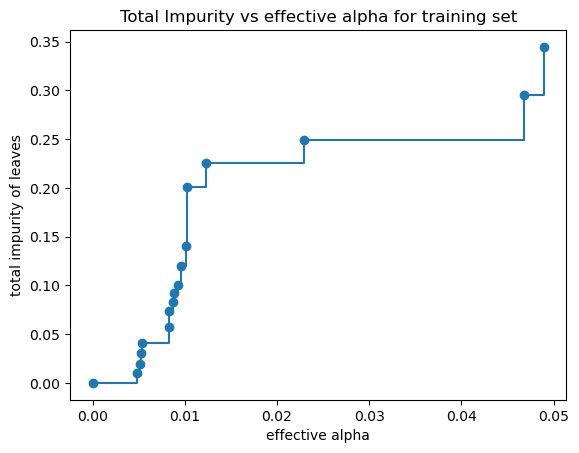

In [99]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [100]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14857419429464191


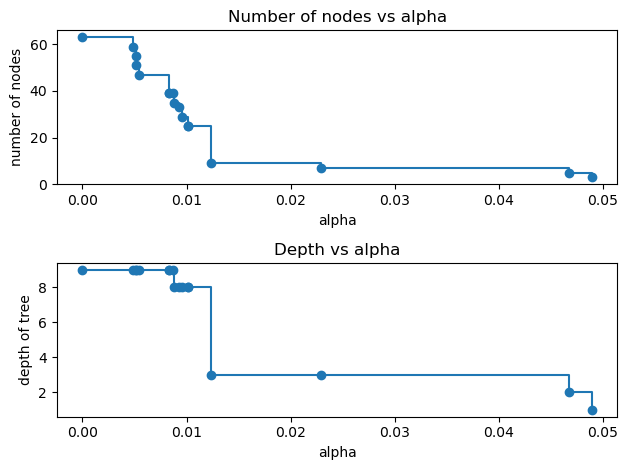

In [101]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

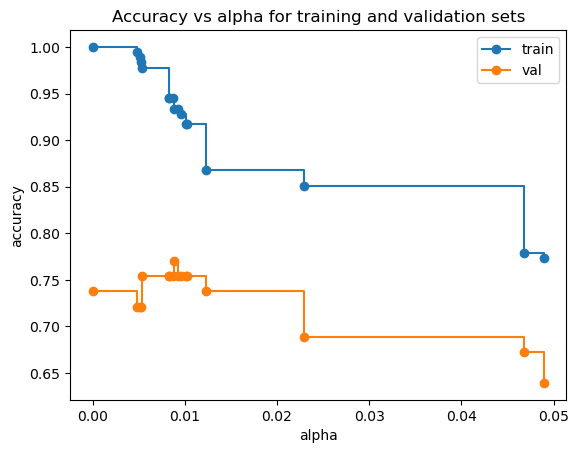

In [102]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

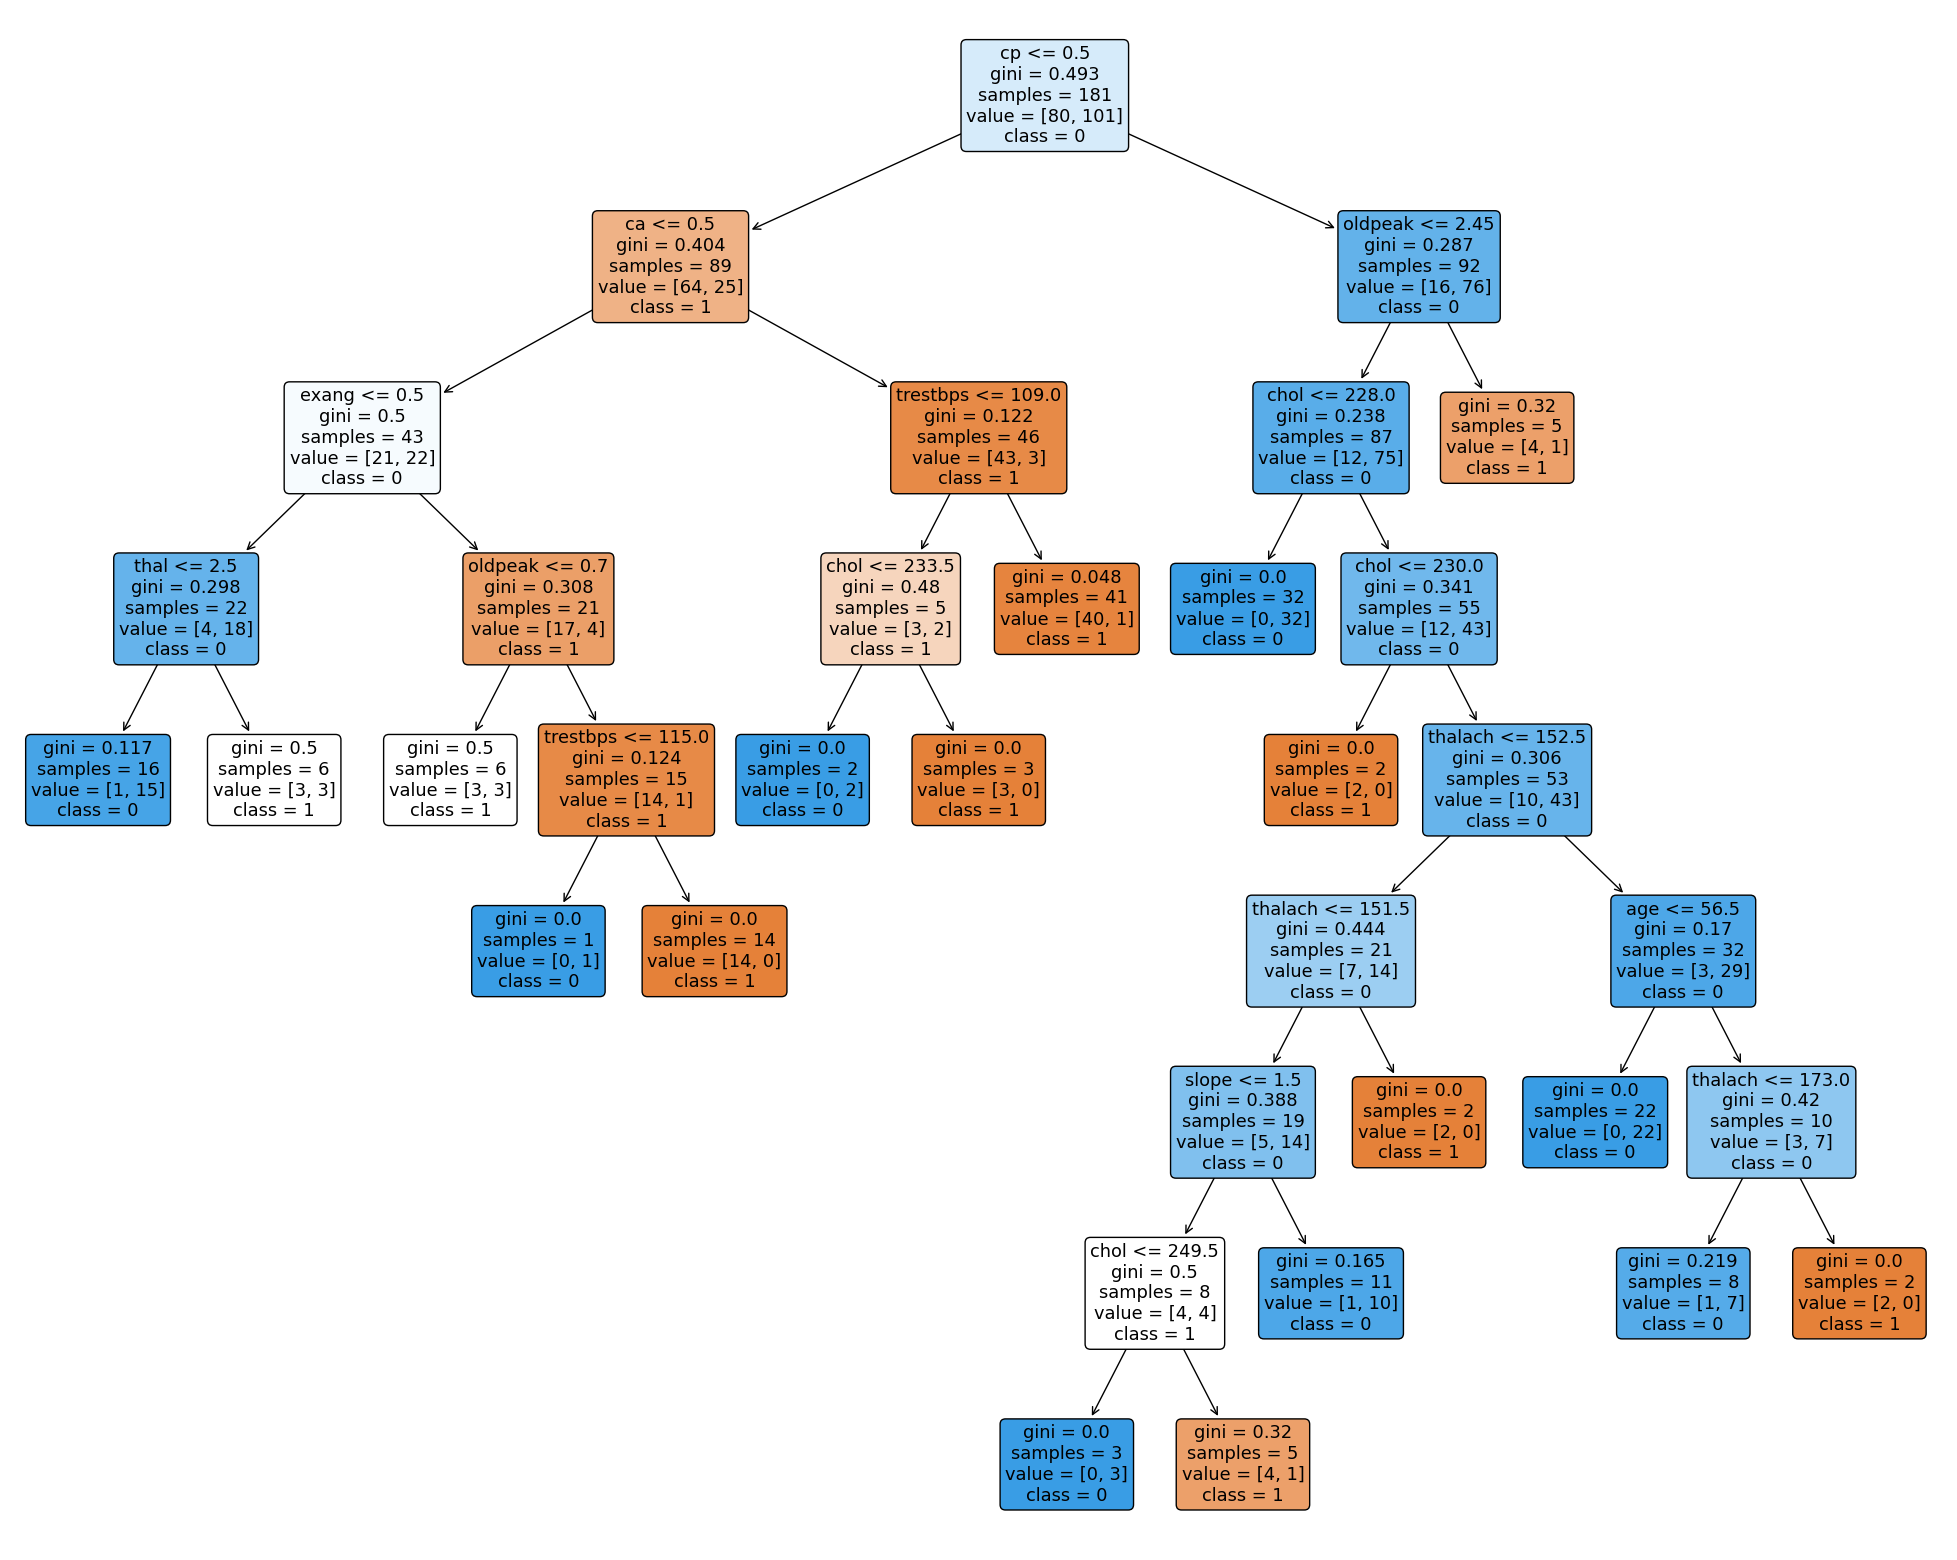

In [103]:
best_clf = clfs[np.argmax(val_scores)]#베스트 스코어 가져오기

fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=features_heart.columns.values,
              class_names=list(map(str, target_heart.unique())),
              rounded=True,
              filled=True)

In [107]:
CART_post_prey = best_clf.predict(X_val)
Perf_Table.loc['CART_Post_pruning'] = perf_eval(y_val, CART_post_prey)

In [108]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure,AUROC
CART,0.875,0.736842,0.655172,0.770492,0.75715,0.8,0.765086
CART_Post_pruning,0.875,0.736842,0.655172,0.770492,0.75715,0.8,0.765086


### Prepruning

In [110]:
# Tree parameter settings
param_grid = {'criterion': ['gini', 'entropy','log_loss'],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50],
                'min_samples_leaf': [i for i in range(1, 100, 10)],
                'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

In [111]:
model = DecisionTreeClassifier(random_state=SEED)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, refit=True)
grid_search.fit(X_train, y_train)

best_criterion = grid_search.best_params_['criterion']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_max_features = grid_search.best_params_['max_features']

print(f'best criterion: {best_criterion}')
print(f'best max_depth: {best_max_depth}')
print(f'best min_samples_split: {best_min_samples_split}')
print(f'best min_samples_leaf: {best_min_samples_leaf}')
print(f'best max_features: {best_max_features}')


y_pred = grid_search.predict(X_val)
Perf_Table.loc['CART_Pre_pruning'] = perf_eval(y_val, y_pred)

Perf_Table



KeyboardInterrupt: 

In [ ]:
CART_pre_prob = grid_search.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, CART_pre_prob)
plt.plot(fpr, tpr, 'o-', label="CART_pre_pruning")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [ ]:
CART_pre = DecisionTreeClassifier(**grid_search.best_params_)
CART_pre.fit(X_train, y_train)
plt.figure(figsize=(25,20))
_ = plot_tree(CART_pre,
                feature_names=features_heart.columns.values,
                class_names=list(map(str, target_heart.unique())),
                rounded=True,
                filled=True)
plt.show()